# Regresión logística
A partir de un conjunto de datos de entrada (características), nuestra `salida sera discreta` (y no continua) por eso utilizamos Regresión Logística (y no Regresión Lineal).

La regresión logística es un Algoritmo Supervisado y se utiliza para clasificación.

Vamos a clasificar problemas con dos posibles estados `SI / NO`: binario o un número finito de "etiquetas" o "clases": múltiple.

### Algunos ejemplos de regresión logística:
- Clasificar si el correo que llega es Spam o No es Spam.
- Dados unos resultados clínicos de un tumor clasificar en "Benigno" o "Maligno".
- El texto de un artículo a analizar es: Entretenimiento, Deportes, Política ó Ciencia.
- A partir del historial bancario conceder un crédito o no.

## Ejercicio de Regresión Logística
Para el ejercicio se a creado un archivo CSV con datos de entrada a modo de ejemplo para clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux. Nuestra información de entrada son 4 características que tomé de una web que utiliza Google Analytics y son:
- Duración de la visita en Segundos
- Cantidad de Páginas Visitadas durante la Sesión
- Cantidad de Acciones del usuario (click, scroll, uso de checkbox, etc)
- Suma de Valor de las acciones (cada acción lleva asociada una valoración de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:
- 0 - Windows
- 1 - Macintosh
- 2 - Linux

La muestra es pequeña son 170 registros para poder comprender el ejercicio, pero recordemos que para conseguir buenos resultados siempre es mejor contar con un número abundante de datos que darán mayor exactitud a las predicciones.

# Regresión Logística con SKLearn

In [2]:
# Librerías necesarias
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
try:
    df = pd.read_csv('./data/usuarios_win_mac_lin.csv')
    print('Dimensiones del DataFrame: ', df.shape)
except FileNotFoundError as e:
    print('Ocurrió un error: ', e)


Dimensiones del DataFrame:  (170, 5)


In [4]:
df.head(5)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [5]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Despues de esto utilizando `df.groupby` podemos ver la cantidad de registros que tenemos para cada clase (Sistema Operativo)

In [6]:
print(df.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualización de los datos
Las visualizaciones muchas veces nos pueden ayudar a comprender mejor las características de la información con la que trabajamos y su correlación.
Primero visualizamos en formato de historial los cuatro Features (características) que tenemos en el dataset.

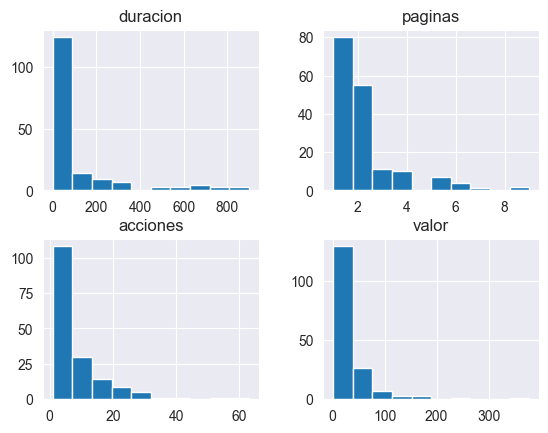

In [7]:
df.drop(['clase'],axis = 1).hist()
plt.show()

También podemos interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores
Windows -> Azul
Macintosh -> Verde
Linux -> Rojo

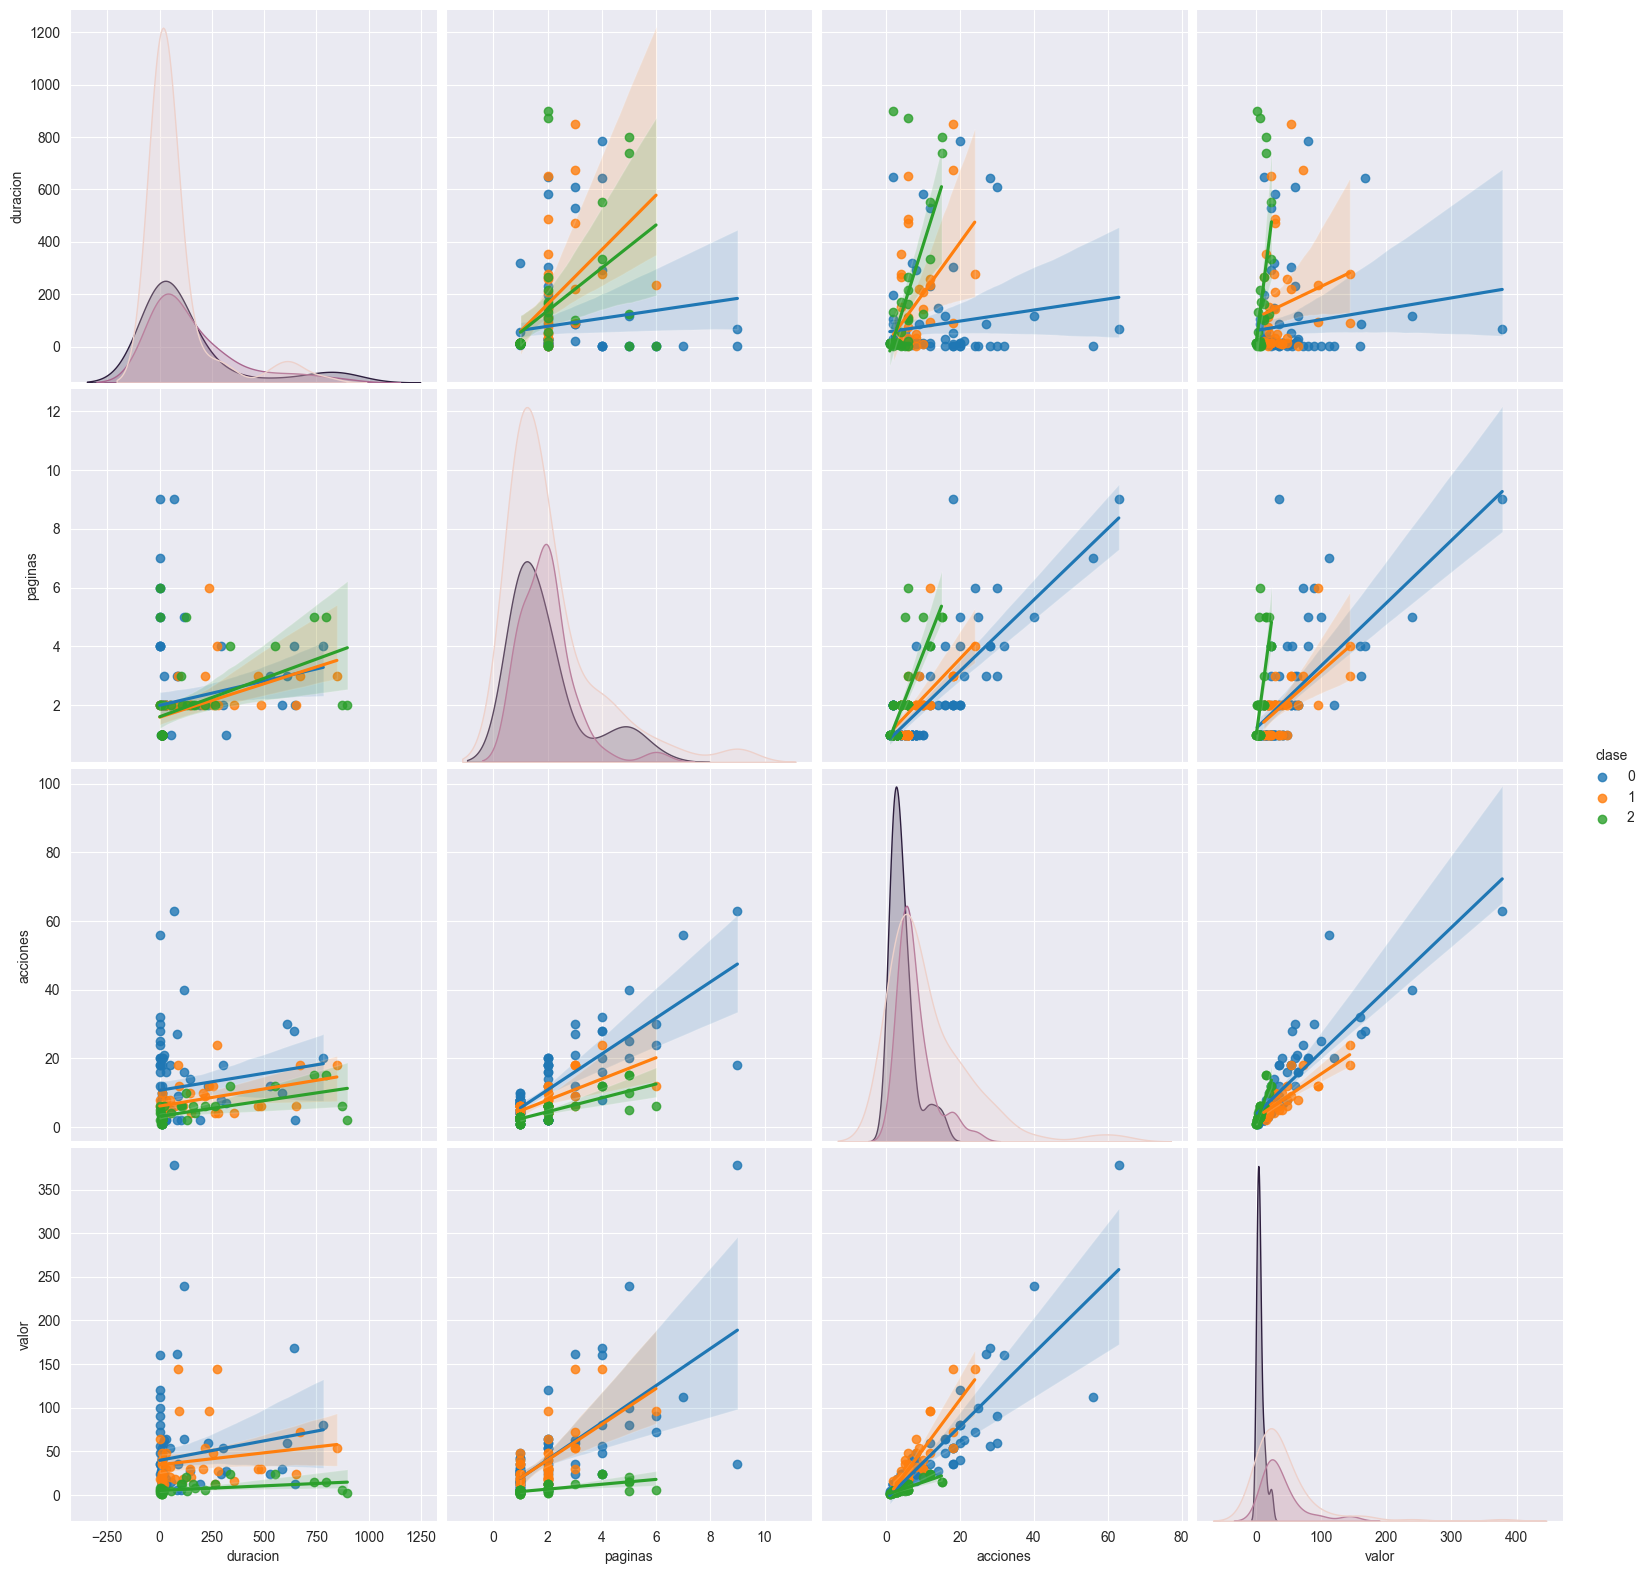

In [8]:
sns.pairplot(df.dropna(), hue="clase",
             height = 4,
             vars = ['duracion','paginas','acciones','valor'],
             kind = 'reg')
plt.show()

# Creación del modelo de regresión logística
Ahora cargamos las variables de las 4 columnas de entrada en X excluyendo la columna 'clase' con el metodo `drop()`. Agregamos la columna 'clase' en la variable y. Ejecutando X.shape para comprobar la dimensión de nuestra matriz con datos de entrada de 170 registros por 4 columnas.

In [9]:
X = np.array(df.drop(['clase'],axis=1))
Y = np.array(df['clase'])
print(X.shape)

(170, 4)


Hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas Y.

In [10]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X,Y)

LogisticRegression(max_iter=1000)

Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el methods `predict()` y revisamos algunas de las salidas y vemos que coincide con las salidas reales de nuestro archivo csv.

In [11]:
predictions = model.predict(X)
print(predictions[:5])

[2 2 2 2 2]


Y confirmamos que tan bueno fue nuestro modelo utilizando `model.score()` que nos devuelve la presición media de las predicciones, en nuestro caso el 77%

In [12]:
model.score(X,Y) # Precision media de las predicciones

0.7764705882352941

# Validación de nuestro modelo
>Una buena práctica de Machine Learning es separar una parte de los datos para validar el modelo, en nuestro caso separamos el 20% de los datos para validación y el 80% para entrenamiento.

In [28]:
validation_size = 0.20
seed = 10000
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    Y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

Volvemos a compilar nuestro modelo de Regresión Logística, pero esta vez solo con 80% de los datos de entrada y calculamos el nuevo `scoring` que ahora nos da un 74% de precisión.

In [29]:
name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits=10,
                              random_state=seed,shuffle=True)
cv_results = model_selection.cross_val_score(model,X_train,
                                             y_train,
                                             cv=kfold,
                                             scoring='accuracy')
print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

Logistic Regression: 0.730220 (0.136314)


Ahora hacemos las predicciones -en realidad clasificación- utilizando nuestro "test set", es decir del subconjunto que habiamos apartado.

In [31]:
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.7941176470588235


# Reporte de resultados de modelo
Finalmente, vemos en pantalla la "matriz de confusión" donde muestra cuantos resultados equivocates tuvo en cada clase (los que no están en la diagonal).

In [32]:
print(confusion_matrix(y_test,predictions))

[[15  2  0]
 [ 5  3  0]
 [ 0  0  9]]


También podemos ver el reporte de clasificación con nuestro conjunto de Test.

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.60      0.38      0.46         8
           2       1.00      1.00      1.00         9

    accuracy                           0.79        34
   macro avg       0.78      0.75      0.76        34
weighted avg       0.78      0.79      0.78        34



> Como podemos observar el gran problema de este modelo es la cantidad de datos que tenemos para la clase 1. Por eso es la mas baja de todas las clases en precisión y recall. Con un conjunto de datos mas grande y balanceado se podrían obtener mejores resultados.

### Clasificación de nuevos valores
Como último ejercicio, vamos a inventar los datos de entrada de navegación de un usuario ficticio que tiene estos valores:
- Tiempo de duración: 10
- Paginas visitadas: 3
- Acciones al navegar: 5
- Valoración: 9

In [41]:
X_new  = pd.DataFrame({'duracion':[10],
                           'paginas':[3],
                           'acciones':[5],
                           'valor':[9]})
final_predictions = model.predict(X_new.values)
print('El sistema operativo predicho es: ', final_predictions[0])

El sistema operativo predicho es:  2
